<a href="https://colab.research.google.com/github/PrathamSaini01/Encryptix-Projects/blob/main/Movie_Rating_Prediction_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder


In [5]:
# Load the dataset

df = pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
# As file contains characters not encoded in UTF-8.

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check the data types and missing values
print("\nData types and missing values:")
print(df.info())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(df.describe())


First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

In [29]:
# Handle missing values for numeric columns
numeric_means = df.select_dtypes(include=['float64', 'int64']).mean()
df.fillna(numeric_means, inplace=True)

# Identify columns with 'object' dtype (likely to contain strings)
object_columns = df.select_dtypes(include=['object']).columns

# Encode categorical variables
label_enc = LabelEncoder()
for col in object_columns:
    if col != 'Rating':  # Assuming 'Rating' is your target variable
        df[col] = label_enc.fit_transform(df[col].astype(str))

# Scaling numerical features
numerical_features = ['budget', 'runtime']
if all(col in df.columns for col in numerical_features):
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define features and target variable
X = df.drop('Rating', axis=1)
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")


Data preprocessing complete.


In [26]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE) of Linear Regression: {rmse}')


Root Mean Squared Error (RMSE) of Linear Regression: 0.9747732326847883


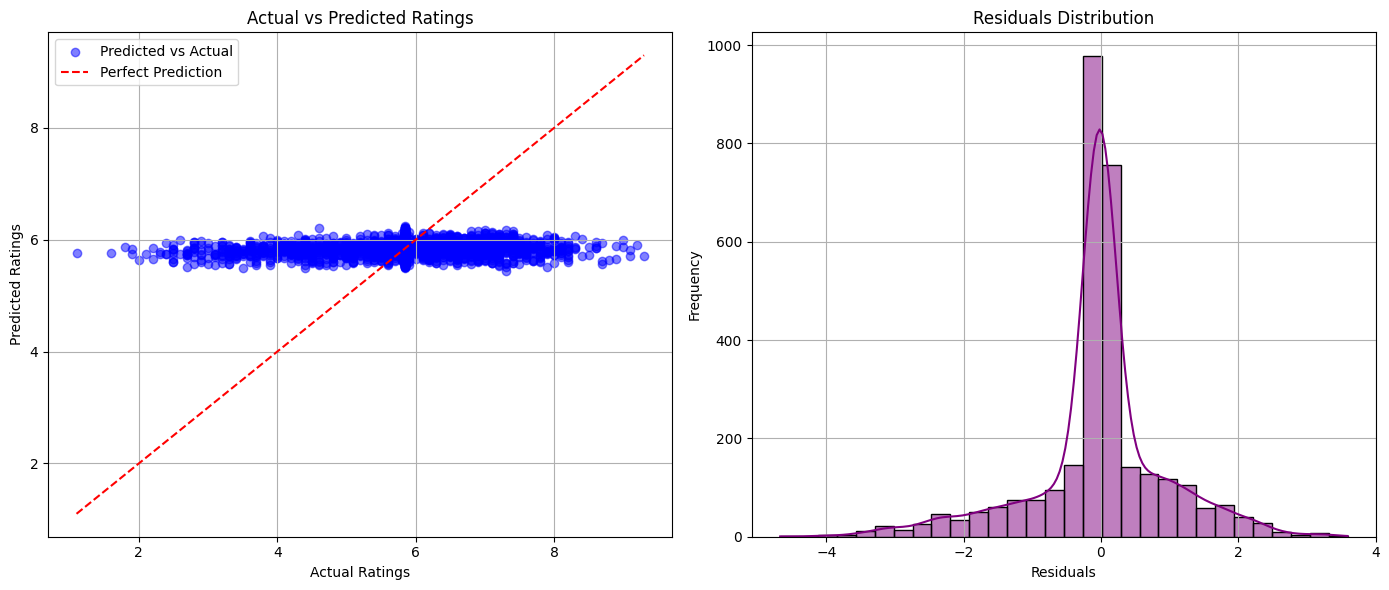

In [28]:
# Distribution of actual vs predicted ratings
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted ratings
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)

# Plot of the distribution of residuals
residuals = y_test - y_pred

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()
